In [2]:
# Importing Datasets

In [3]:
true=pd.read_csv('True.csv',encoding= 'latin-1' , on_bad_lines='skip')

In [4]:
fake=pd.read_csv('Fake.csv',encoding='latin-1')

In [5]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [6]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obamas Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [7]:
# creating labels for both the dataframes
true['label']=1
fake['label']=0

# EDA

In [8]:
# Dropping Duplicate rows 

In [9]:
true[true.duplicated]

,title,text,subject,date,label
445,Senate tax bill stalls on deficit-focused 'tri...,WASHINGTON (Reuters) - The U.S. Senate on Thur...,politicsNews,"November 30, 2017",1
778,Trump warns 'rogue regime' North Korea of grav...,BEIJING (Reuters) - U.S. President Donald Trum...,politicsNews,"November 8, 2017",1
892,"Republicans unveil tax cut bill, but the hard ...",WASHINGTON (Reuters) - U.S. House of Represent...,politicsNews,"November 2, 2017",1
896,Trump taps Fed centrist Powell to lead U.S. ce...,WASHINGTON (Reuters) - President Donald Trump ...,politicsNews,"November 2, 2017",1
974,"Two ex-Trump aides charged in Russia probe, th...",WASHINGTON (Reuters) - Federal investigators p...,politicsNews,"October 30, 2017",1
...,...,...,...,...,...
21227,France unveils labor reforms in first step to ...,PARIS (Reuters) - French President Emmanuel Ma...,worldnews,"August 31, 2017",1
21262,Guatemala top court sides with U.N. graft unit...,GUATEMALA CITY (Reuters) - Guatemala s top cou...,worldnews,"August 29, 2017",1
21289,"Europeans, Africans agree renewed push to tack...",PARIS (Reuters) - Europe s big four continen...,worldnews,"August 28, 2017",1
21352,Thailand's ousted PM Yingluck has fled abroad:...,BANGKOK (Reuters) - Ousted Thai prime minister...,worldnews,"August 25, 2017",1


In [10]:
true.drop_duplicates(inplace=True)

In [11]:
fake.drop_duplicates(inplace=True)

In [12]:
# missing values
true.isna().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

In [13]:
fake.isna().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

In [14]:
# Dropping unnecessary columns
true.drop(columns=['title','date'],inplace=True)
fake.drop(columns=['title','date'],inplace=True)

# Word Cloud

In [15]:
import spacy
nlp=spacy.load('en_core_web_sm')

In [16]:
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [17]:
import re
from nltk.stem import SnowballStemmer
stem = SnowballStemmer("english")
lem=WordNetLemmatizer()

def clean_words(text):
    # Define a regex pattern for URLs
    url_pattern = re.compile(r'http[s]?://\S+')
    
    # Remove URLs from the text
    text = re.sub(url_pattern, '', text)
    doc= nlp(text)
    clean_text=[x.lemma_ for x in doc if not x.is_stop and not x.is_punct and not x.like_num and not x.is_bracket and not x.pos_ in ['SYM']]
    clean_text=[stem.stem(x) for x in clean_text]
    return ' '.join(clean_text)


In [18]:
# Apply the cleaning function to the 'text' column
true['cleaned_text'] = true['text'].apply(clean_words)

In [19]:
# Apply the cleaning function to the 'text' column
fake['cleaned_text'] = fake['text'].apply(clean_words)

In [20]:
df= [x.strip() for x in true.cleaned_text] # remove the space in paragraph

In [21]:
txt=''.join(df)

In [22]:
df1= [x.strip() for x in fake.cleaned_text] # remove the space in paragraph

In [23]:
txt1=''.join(df1)

# word cloud

In [24]:
import wordcloud

In [25]:
from wordcloud import WordCloud,STOPWORDS

In [26]:
def wordcloud(data):
  plt.figure(figsize=(10,10))
  plt.imshow(data,interpolation='bilinear')
  plt.axis('off')
  plt.show()  

In [27]:
df_true= WordCloud(width=800,height=1000,background_color='black',colormap='plasma').generate(txt)

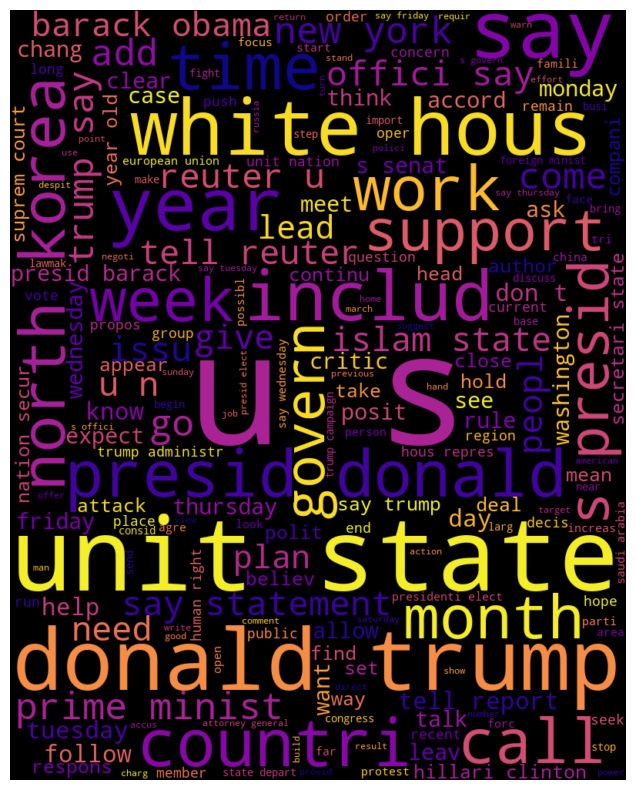

In [28]:
wordcloud(df_true)

In [29]:
df_fake=WordCloud(width=800,height=1000,background_color='black',max_words=50,min_font_size=50,max_font_size=100,colormap='plasma').generate(txt1)

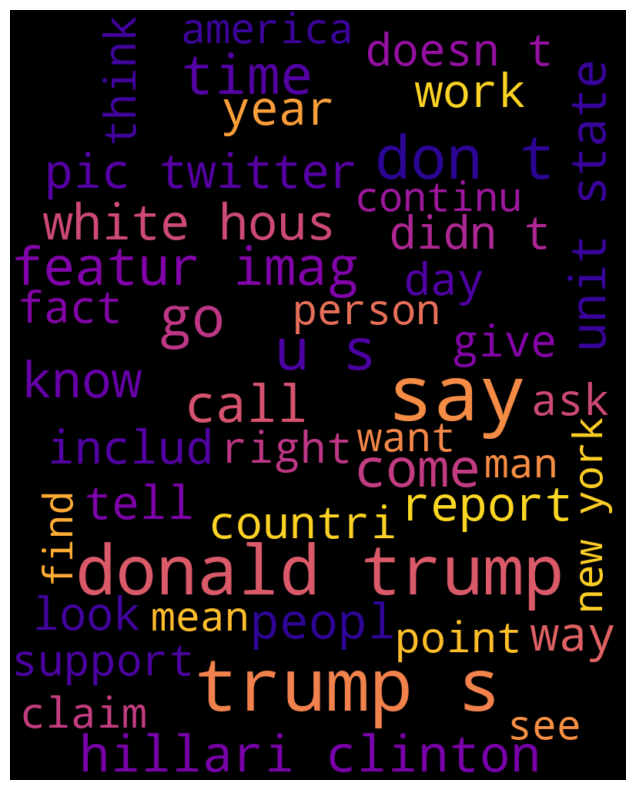

In [30]:
wordcloud(df_fake)

In [31]:
data=pd.concat([true,fake],axis=0)

In [32]:
data

,text,subject,label,cleaned_text
0,WASHINGTON (Reuters) - The head of a conservat...,politicsNews,1,washington reuter head conserv republican fact...
1,WASHINGTON (Reuters) - Transgender people will...,politicsNews,1,washington reuter transgend peopl allow time e...
2,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,1,washington reuter special counsel investig lin...
3,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,1,washington reuter trump campaign advis georg p...
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,1,seattl washington reuter presid donald trump c...
...,...,...,...,...
23476,21st Century Wire says As 21WIRE reported earl...,Middle-east,0,centuri wire say 21wire report earli week unli...
23477,21st Century Wire says It s a familiar theme. ...,Middle-east,0,centuri wire say s familiar theme disput chang...
23478,Patrick Henningsen 21st Century WireRemember ...,Middle-east,0,patrick henningsen centuri wirerememb obama ...
23479,21st Century Wire says Al Jazeera America will...,Middle-east,0,centuri wire say al jazeera america histori bi...


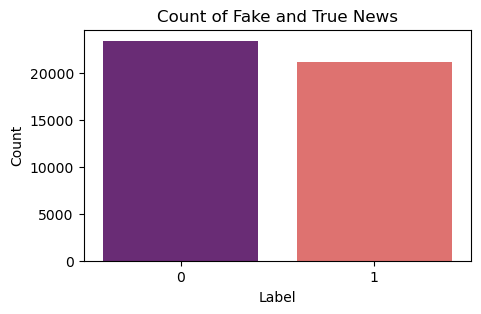

In [33]:
# count of fake and true news
count = data['label'].value_counts()

plt.figure(figsize=(5, 3))
sns.barplot(x=count.index, y=count.values, palette='magma')
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Count of Fake and True News')
plt.show() 

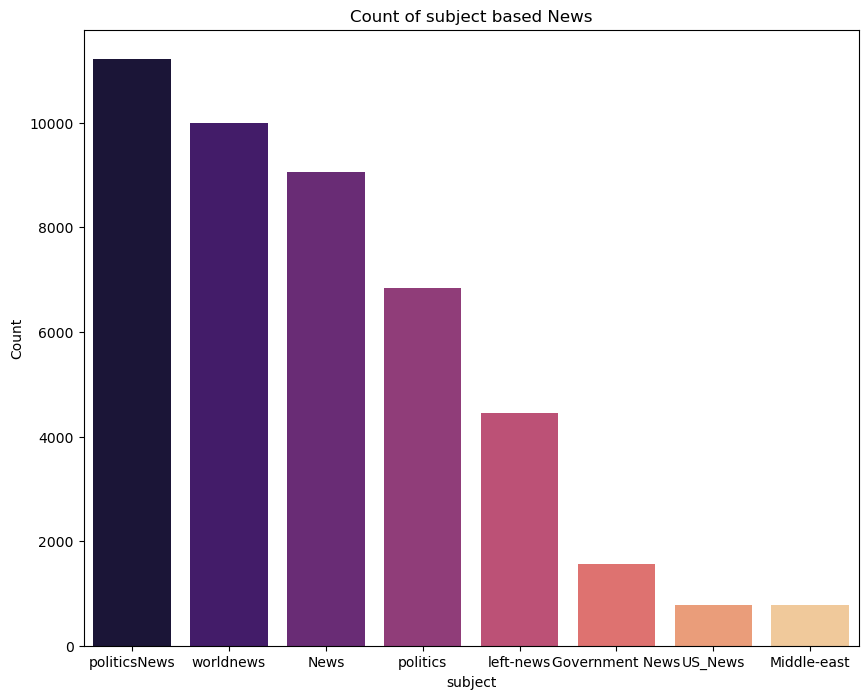

In [34]:
# count of subject based news
count_sub = data['subject'].value_counts()

plt.figure(figsize=(10, 8))
sns.barplot(x=count_sub.index, y=count_sub.values, palette='magma')
plt.xlabel('subject')
plt.ylabel('Count')
plt.title('Count of subject based News')
plt.show()

In [35]:
data.drop(columns=['subject'],inplace=True)

<Figure size 600x400 with 0 Axes>

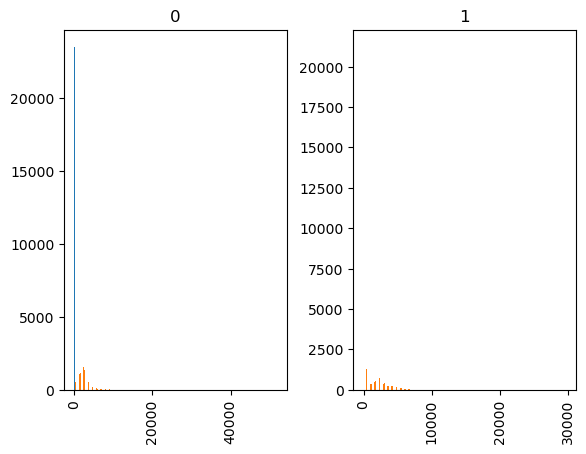

In [36]:
data['len']=data['text'].apply(len)

# histogram
plt.figure(figsize=(6,4))
data.hist(by='label',bins=250)
#sns.histplot(data=data,x='len',by='label',palette='magma',stat='density')
plt.show()

# Sentiment Analysis

In [37]:
#! pip install textblob

In [38]:

from textblob import TextBlob
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

In [39]:
data['sentiment'] = data['cleaned_text'].apply(get_sentiment)

C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


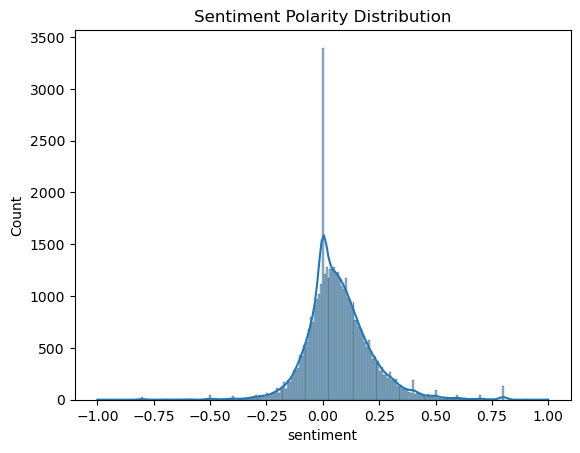

In [40]:
sns.histplot(data['sentiment'], kde=True)
plt.title('Sentiment Polarity Distribution')
plt.show()

In [41]:
from sklearn.feature_extraction.text import CountVectorizer

def plot_ngrams(data, n=1):
    vectorizer = CountVectorizer(ngram_range=(n, n))
    ngrams = vectorizer.fit_transform(data)
    ngrams_freq = ngrams.sum(axis=0).A1
    ngrams_df = pd.DataFrame(ngrams_freq, index=vectorizer.get_feature_names_out(), columns=['frequency'])
    ngrams_df = ngrams_df.sort_values(by='frequency', ascending=False).head(20)
    
    plt.figure(figsize=(10,5))
    sns.barplot(x=ngrams_df.frequency, y=ngrams_df.index, palette='viridis')
    plt.title(f'Top {n}-grams')
    plt.show()

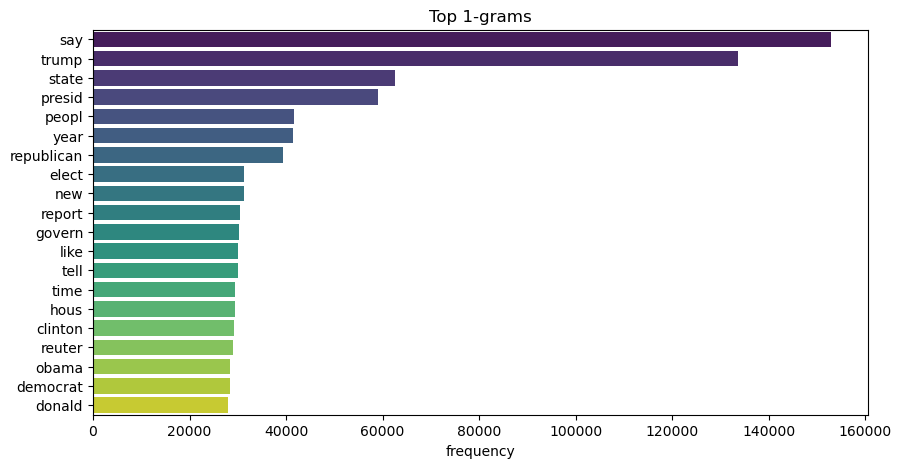

In [42]:
## Unigrams
plot_ngrams(data['cleaned_text'], n=1)

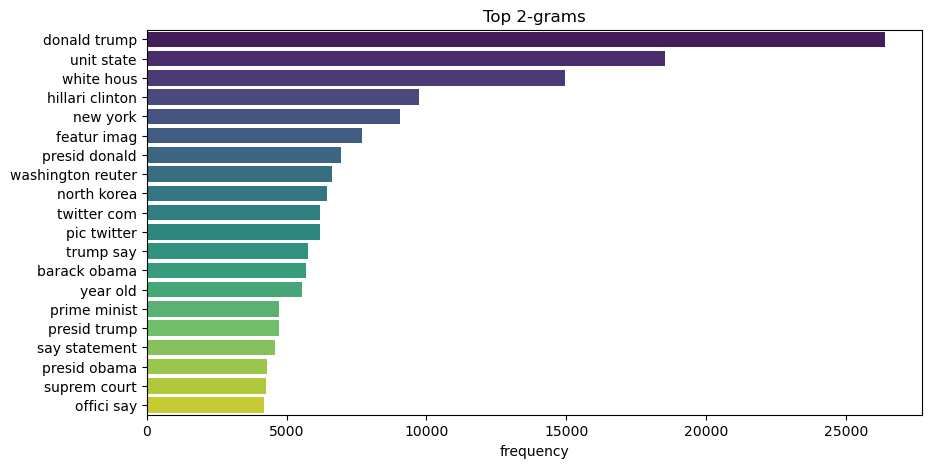

In [43]:
# Bigrams
plot_ngrams(data['cleaned_text'], n=2)  

In [44]:
## Tfidf Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [45]:
vectorizer = TfidfVectorizer(max_features=5000)

In [46]:
X = vectorizer.fit_transform(data['cleaned_text'])

In [47]:
Y = data[['label']]

# Train a machine learning model

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, roc_curve, auc, roc_auc_score,RocCurveDisplay

In [142]:

## split the data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size =0.20, stratify=Y,random_state=42)

In [143]:
y_train

,label
682,0
13593,1
2325,0
12547,0
4716,1
...,...
16750,0
931,0
21228,1
6109,0


In [144]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((35750, 5000), (35750, 1), (8938, 5000), (8938, 1))

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


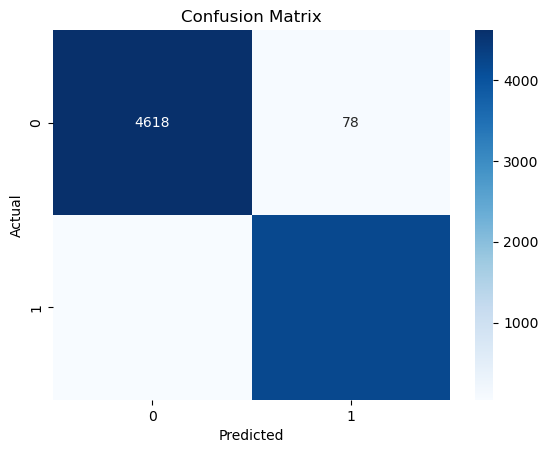

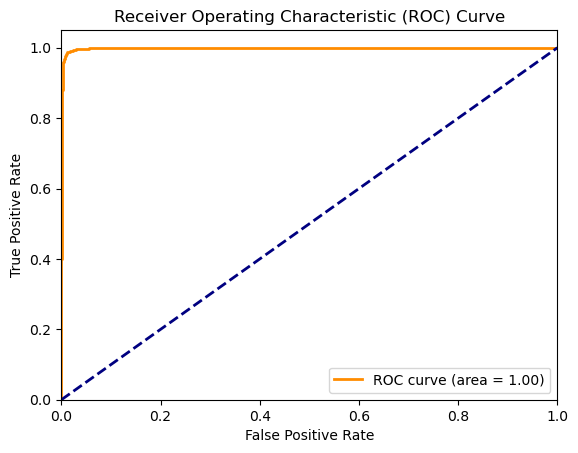

AUC Score: 0.998717849090823


In [145]:
# Train the logistic regression model
model1 = LogisticRegression(max_iter=10000)
model1.fit(x_train, y_train)

# Predict the test set results
y_pred = model1.predict(x_test)
y_pred_proba = model1.predict_proba(x_test)[:, 1]

# Generate and display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Generate and display the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Print AUC score
print("AUC Score:", roc_auc_score(y_test, y_pred_proba))

Fitting 3 folds for each of 4 candidates, totalling 12 fits


C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best Parameters:  {'alpha': 0.01}
Best Score:  0.9326712917905221


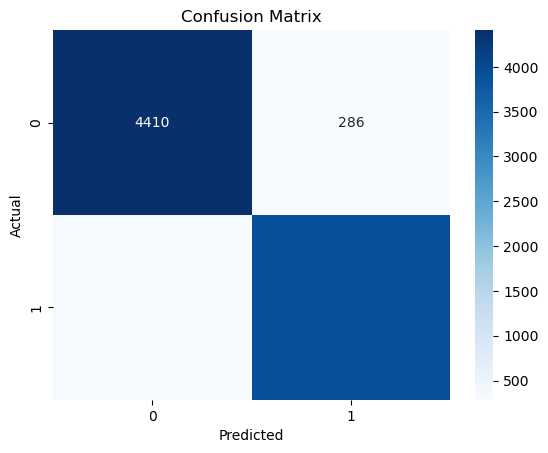

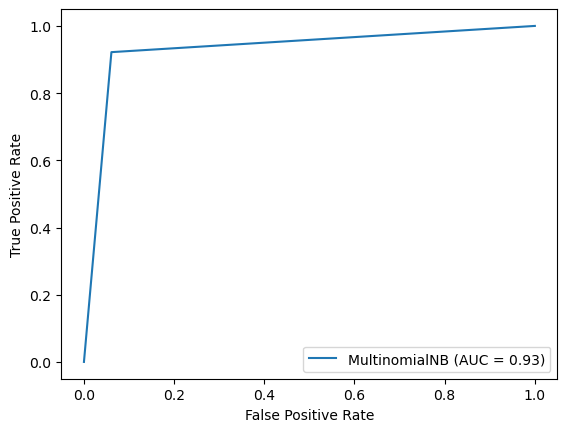

Accuracy:  0.9309688968449318


In [146]:
model2 = MultinomialNB()

# Define the hyperparameters grid
param_grid = {
    'alpha': [0.01, 0.1, 0.5, 1.0]
}

# Perform hyperparameter tuning with GridSearchCV
grid_search = GridSearchCV(estimator=model2, param_grid=param_grid, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(x_train, y_train)

# Print the best parameters and best score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

# Train the model with the best parameters
best_model = grid_search.best_estimator_
best_model.fit(x_train, y_train)

# Predict on the test set
y_pred = best_model.predict(x_test)
y_pred_proba = best_model.predict_proba(x_test)

# Generate and display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='MultinomialNB').plot()
plt.show()

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

C:\Users\Dell\AppData\Local\Temp\ipykernel_9352\3256112954.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)


Accuracy: 0.9979861266502573


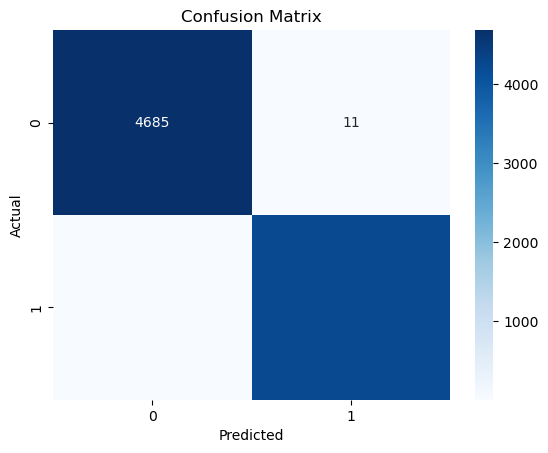

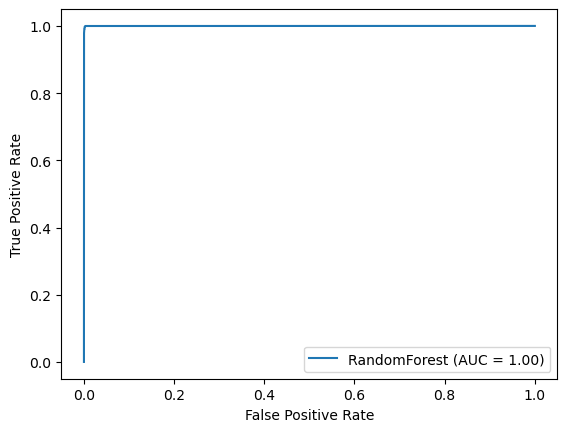

Accuracy:  0.9979861266502573


In [147]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

# Step 3: Make predictions and evaluate
y_pred = model.predict(x_test)
y_prob = model.predict_proba(x_test)[:, 1]

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Generate and display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='RandomForest').plot()
plt.show()
# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END .......criterion=gini, max_depth=1, splitter=random; total time=   0.5s
[CV] END .......criterion=gini, max_depth=1, splitter=random; total time=   0.4s
[CV] END .......criterion=gini, max_depth=1, splitter=random; total time=   0.4s
[CV] END .......criterion=gini, max_depth=1, splitter=random; total time=   0.4s
[CV] END .......criterion=gini, max_depth=1, splitter=random; total time=   0.4s
[CV] END .........criterion=gini, max_depth=1, splitter=best; total time=   1.3s
[CV] END .........criterion=gini, max_depth=1, splitter=best; total time=   1.2s
[CV] END .........criterion=gini, max_depth=1, splitter=best; total time=   1.3s
[CV] END .........criterion=gini, max_depth=1, splitter=best; total time=   1.3s
[CV] END .........criterion=gini, max_depth=1, splitter=best; total time=   1.3s
[CV] END .......criterion=gini, max_depth=2, splitter=random; total time=   0.6s
[CV] END .......criterion=gini, max_depth=2, sp

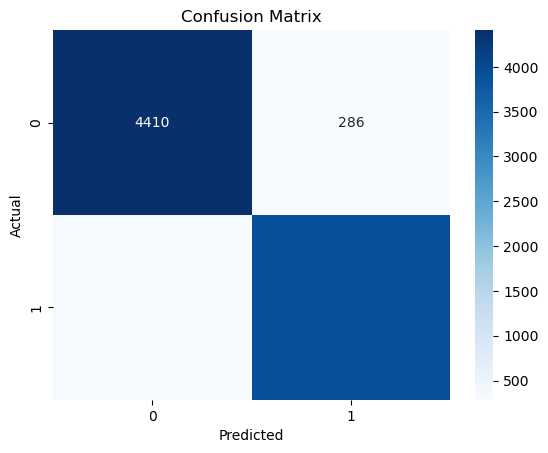

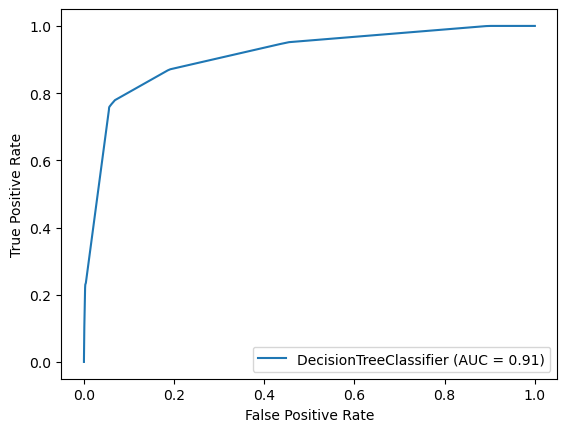

In [64]:
model4 = DecisionTreeClassifier()

# Define the hyperparameters grid
params={'max_depth':[1,2,3,4,5,6],'criterion':['gini','entropy'],'splitter':['random','best']}
grid_search=GridSearchCV(model4,params,verbose=2)
grid_search.fit(x_train,y_train)

# Print the best parameters and best score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

# Predict on the test set
y_pred = best_model.predict(x_test)
y_pred_proba = best_model.predict_proba(x_test)
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Generate and display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='DecisionTreeClassifier').plot()
plt.show()

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.9933989706869546


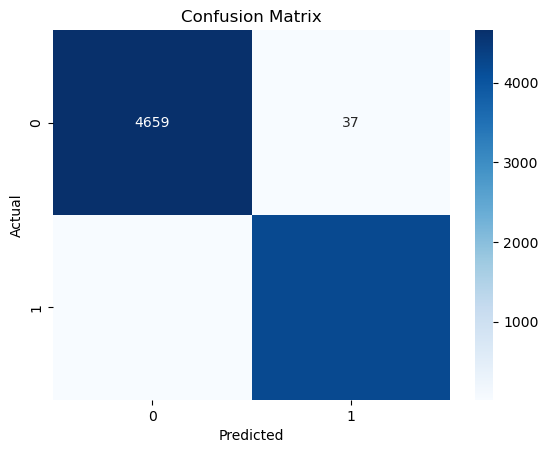

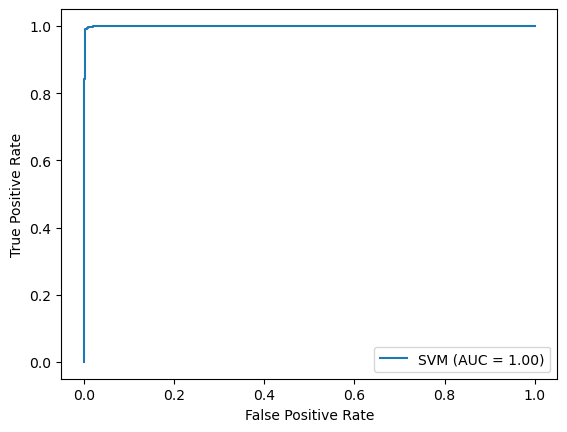

In [65]:
model5 = SVC(kernel='linear', probability=True, random_state=42)
model5.fit(x_train, y_train)
# Step 3: Make predictions and evaluate
y_pred = model5.predict(x_test)
y_prob = model5.predict_proba(x_test)[:, 1]
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
# Generate and display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='SVM').plot()
plt.show()

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy: 0.7509509957484896


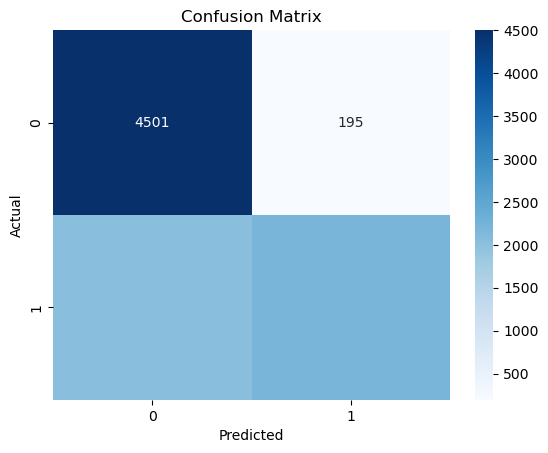

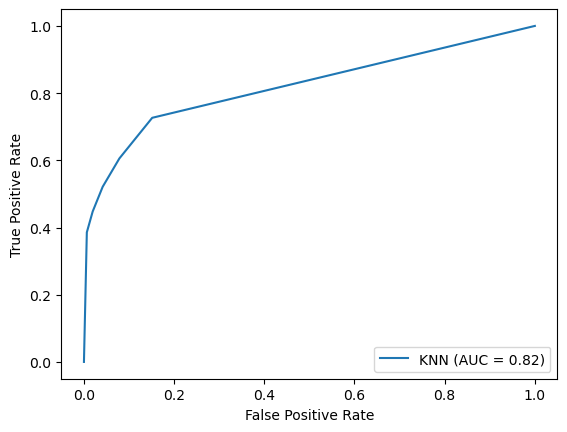

In [66]:
model6 = KNeighborsClassifier(n_neighbors=5)
model6.fit(x_train, y_train)

# Step 3: Make predictions and evaluate
y_pred = model6.predict(x_test)
y_prob = model6.predict_proba(x_test)[:, 1]

# Accuracy
accuracy6 = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy6}')
# Generate and display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='KNN').plot()
plt.show()

C:\Users\Dell\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:26:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.9979861266502573
ROC AUC: 0.9998525132386689

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4696
           1       1.00      1.00      1.00      4242

    accuracy                           1.00      8938
   macro avg       1.00      1.00      1.00      8938
weighted avg       1.00      1.00      1.00      8938



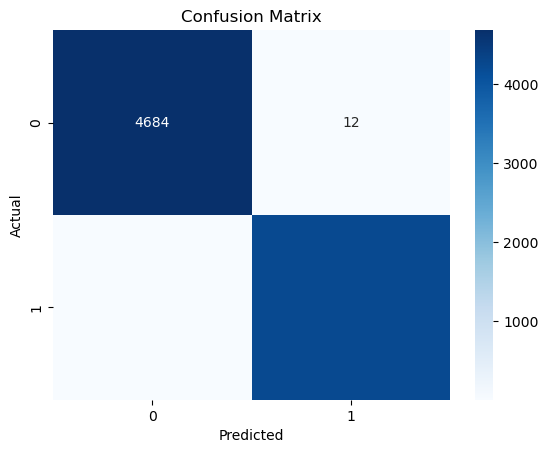

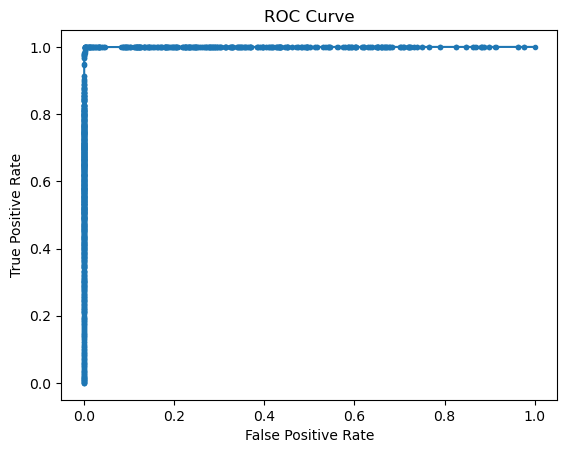

In [69]:
# Initialize the XGBoost model
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Train the model
model.fit(x_train, y_train)

# Make predictions
y_pred = model.predict(x_test)
y_pred_proba = model.predict_proba(x_test)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Accuracy: {accuracy}")
print(f"ROC AUC: {roc_auc}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


In [148]:
data

,text,label,cleaned_text,len,sentiment
0,WASHINGTON (Reuters) - The head of a conservat...,1,washington reuter head conserv republican fact...,4659,0.031703
1,WASHINGTON (Reuters) - Transgender people will...,1,washington reuter transgend peopl allow time e...,4077,0.125207
2,WASHINGTON (Reuters) - The special counsel inv...,1,washington reuter special counsel investig lin...,2789,0.360791
3,WASHINGTON (Reuters) - Trump campaign adviser ...,1,washington reuter trump campaign advis georg p...,2461,0.089435
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,1,seattl washington reuter presid donald trump c...,5204,-0.025000
...,...,...,...,...,...
23476,21st Century Wire says As 21WIRE reported earl...,0,centuri wire say 21wire report earli week unli...,3237,0.119102
23477,21st Century Wire says It s a familiar theme. ...,0,centuri wire say s familiar theme disput chang...,1684,0.345635
23478,Patrick Henningsen 21st Century WireRemember ...,0,patrick henningsen centuri wirerememb obama ...,25065,0.072720
23479,21st Century Wire says Al Jazeera America will...,0,centuri wire say al jazeera america histori bi...,2685,0.127500


In [149]:
model_accuracies = {
    'Logistic Regression': 0.99,
    'MultinomialNB': 0.93,
    'RandomForestClassifier': 0.99,
    'DecisionTreeClassifier': 0.93,
    'SVM':0.99,
    'KNN' : 0.75,
    'XGBClassifier':0.99
}

# Convert the dictionary to a DataFrame
accuracy_df = pd.DataFrame(list(model_accuracies.items()), columns=['Model', 'Accuracy'])
# Display the DataFrame
print(accuracy_df)

                    Model  Accuracy
0     Logistic Regression      0.99
1           MultinomialNB      0.93
2  RandomForestClassifier      0.99
3  DecisionTreeClassifier      0.93
4                     SVM      0.99
5                     KNN      0.75
6           XGBClassifier      0.99


# Deployment

In [154]:
import pickle

In [156]:
file='model.pkl'

In [157]:
pickle.dump(model,open(file,'wb'))

In [158]:
file1='vector.pkl'

In [159]:
pickle.dump(vectorizer,open(file1,'wb'))